In [1]:
# file kfkd.py
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle


FTRAIN = '~/data/kaggle-facial-keypoint-detection/training.csv'
FTEST = '~/data/kaggle-facial-keypoint-detection/test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [5]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)
import cPickle as pickle
with open('net1.pickle', 'wb') as f:
    pickle.dump(net1, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    102     0.00469     0.00541    0.86688  0.05s
    103     0.00466     0.00539    0.86567  0.05s
    104     0.00464     0.00537    0.86461  0.05s
    105     0.00462     0.00534    0.86395  0.05s
    106     0.00459     0.00532    0.86271  0.05s
    107     0.00457     0.00530    0.86163  0.05s
    108     0.00455     0.00528    0.86101  0.05s
    109     0.00452     0.00526    0.85995  0.05s
    110     0.00450     0.00524    0.85913  0.05s
    111     0.00448     0.00522    0.85800  0.05s
    112     0.00446     0.00520    0.85738  0.05s
    113     0.00444     0.00518    0.85608  0.05s
    114     0.00442     0.00516    0.85542  0.05s
    115     0.00439     0.00514    0.85447  0.05s
    116     0.00437     0.00512    0.85332  0.05s
    117     0.00435     0.00510    0.85270  0.05s
    118     0.00433     0.00509    0.85177  0.05s
    119     0.00431     0.00507    0.85063  0.05s
    120     0.00429     0.00505    0.84994  0.05s
    121     0.00427     0.00503    0.84907  0.05s


    223     0.00293     0.00383    0.76449  0.05s
    224     0.00292     0.00383    0.76386  0.05s
    225     0.00291     0.00382    0.76336  0.05s
    226     0.00291     0.00381    0.76231  0.05s
    227     0.00290     0.00381    0.76125  0.05s
    228     0.00289     0.00380    0.76035  0.05s
    229     0.00288     0.00379    0.75996  0.05s
    230     0.00287     0.00378    0.75943  0.05s
    231     0.00287     0.00378    0.75873  0.05s
    232     0.00286     0.00377    0.75807  0.05s
    233     0.00285     0.00376    0.75730  0.05s
    234     0.00284     0.00376    0.75682  0.05s
    235     0.00283     0.00375    0.75614  0.05s
    236     0.00283     0.00374    0.75486  0.05s
    237     0.00282     0.00374    0.75413  0.05s
    238     0.00281     0.00373    0.75357  0.05s
    239     0.00280     0.00373    0.75282  0.05s
    240     0.00280     0.00372    0.75216  0.05s
    241     0.00279     0.00371    0.75147  0.05s
    242     0.00278     0.00371    0.75090  0.05s


    356     0.00236     0.00333    0.70995  0.05s
    357     0.00224     0.00323    0.69306  0.05s
    358     0.00223     0.00328    0.67825  0.05s
    359     0.00232     0.00338    0.68616  0.05s
    360     0.00237     0.00335    0.70623  0.05s
    361     0.00229     0.00324    0.70606  0.05s
    362     0.00221     0.00323    0.68357  0.05s
    363     0.00222     0.00332    0.66868  0.05s
    364     0.00230     0.00340    0.67661  0.05s
    365     0.00233     0.00336    0.69247  0.05s
    366     0.00226     0.00326    0.69454  0.05s
    367     0.00219     0.00320    0.68365  0.05s
    368     0.00219     0.00325    0.67512  0.05s
    369     0.00226     0.00331    0.68284  0.05s
    370     0.00229     0.00328    0.69614  0.05s
    371     0.00223     0.00321    0.69440  0.05s
    372     0.00217     0.00320    0.67715  0.05s
    373     0.00219     0.00329    0.66491  0.05s
    374     0.00226     0.00337    0.67203  0.05s
    375     0.00229     0.00333    0.68690  0.05s


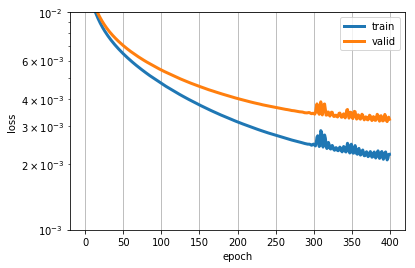

In [7]:
import numpy as np
from matplotlib import pyplot
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.ylim(1e-3, 1e-2)
pyplot.yscale("log")
pyplot.show()

ImageId    1783
Image      1783
dtype: int64


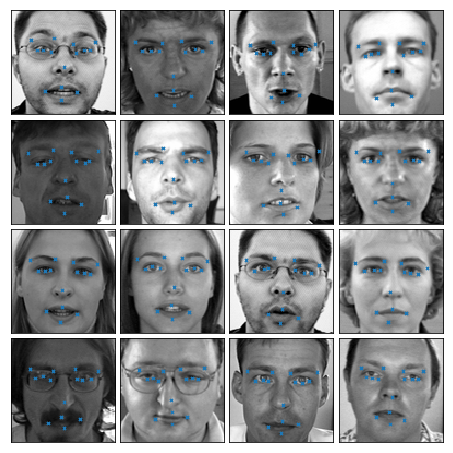

In [8]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()
